In [53]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_text

Text(0.5, 1.0, 'New Inputs')

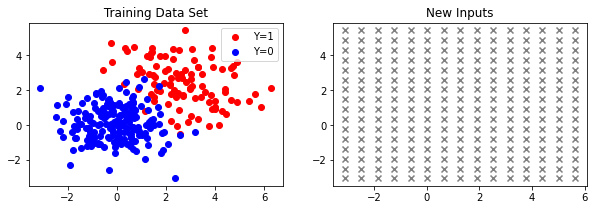

In [54]:
#Groupe 1
N1=100
p1=np.array([2.5,2.5])
m1=[[2, -0.8],[-0.8,2]] 
y1=np.random.multivariate_normal(p1,m1,N1)

#Groupe 2
N2=200
p2=np.zeros(2)
m2=np.eye(2)
y2=np.random.multivariate_normal(p2,m2,N2)


#Graphique
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,2,1)
plt.scatter(y1[:,0],y1[:,1], label='Y=1', color='red')
plt.scatter(y2[:,0],y2[:,1], label='Y=0', color='blue')
plt.legend()
plt.title(' Training Data Set ')


#Notation
x1_min=min( min(y1[:,0]),min(y2[:,0]) )
x1_max=max( max(y1[:,0]),max(y2[:,0]) ) 
x2_min=min( min(y1[:,1]),min(y2[:,1]) )
x2_max=max( max(y1[:,1]),max(y2[:,1]) )
#print(x1_min,x1_max,y1_min,y1_max)  

Neval=15
h1=(x1_max-x1_min)/Neval
h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2)) 

ax=plt.subplot(1,2,2)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')
ax.set_title('New Inputs')

In [55]:
#Mettre mes données training dans un tableau
X=np.append(y1,y2,axis=0)
#Label des données
#Y=[1 for i in range(N1)]
#for i in range(N2):
 #   Y.append(0)
    
Y = np.append([1 for i in range(N1)],[0 for i in range (N2)])
print((Y))
#Utilisation de=u modèle decision tree
#tree=DecisionTreeClassifier()

RF = RandomForestClassifier(max_depth=2, random_state=0, oob_score = True) 
RFfit = RF.fit(X, Y);
Y_pred=RFfit.predict(X);
print(Y_pred)

#Score and decision  on the training set (Why Score? je ne vois que la décision de l'arbre)
#predxclass=np.argmax(Y,axis=1)
#predxclass=predxclass.reshape(300,1)
#print(predxclass)
#Accuracy
E_train=(Y!=Y_pred).sum() / len(Y)
print("Error on the complete training set %5.2f->",E_train)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1

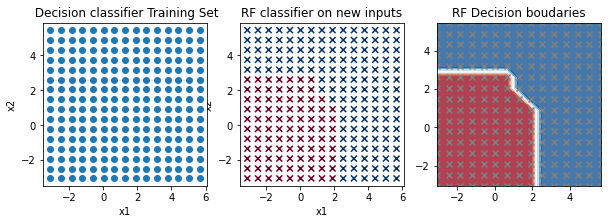

In [56]:
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,2)
X1=np.ravel(x1Eval)
Y1=np.ravel(x2Eval)
XX=np.zeros([240,2])
#Y1.shape
#XX.shape
XX[:,0]=X1
XX[:,1]=Y1
predXXclass=RFfit.predict(XX)
print(predXXclass)
cm = plt.cm.RdBu
ax.scatter(X1,Y1,c=predXXclass,marker='x',cmap=cm)
ax.set_title('RF classifier on new inputs')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax = plt.subplot(1,3,1)
ax.scatter(XX[:,0],XX[:,1],cmap=cm)
ax.set_title(' Decision classifier Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('RF Decision boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [57]:
score=RF.score;
OOB=RF.oob_score_
IF=RF.feature_importances_
print(OOB)
print(IF)

0.9566666666666667
[0.52283489 0.47716511]


In [62]:
#Adaboost
#Model calibration
##Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=1/3, random_state=0)
Ab = AdaBoostClassifier(n_estimators=100, random_state=0) 
Abfit=Ab.fit(X_train, Y_train)
y_pred=Abfit.predict(X_test);
E_all=(Y_test != y_pred).sum()/len(Y_test)
print("Boost Error on the complete training set %5.2f->",E_all)

Boost Error on the complete training set %5.2f-> 0.03


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1

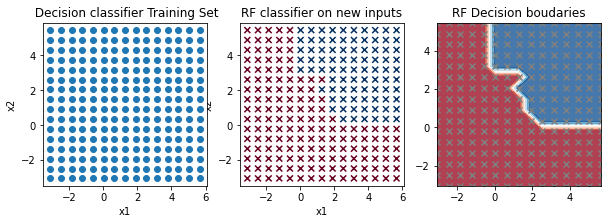

In [63]:
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,2)
X1=np.ravel(x1Eval)
Y1=np.ravel(x2Eval)
XX=np.zeros([240,2])
#Y1.shape
#XX.shape
XX[:,0]=X1
XX[:,1]=Y1
predXXclass=Abfit.predict(XX)
print(predXXclass)
cm = plt.cm.RdBu
ax.scatter(X1,Y1,c=predXXclass,marker='x',cmap=cm)
ax.set_title('RF classifier on new inputs')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax = plt.subplot(1,3,1)
ax.scatter(XX[:,0],XX[:,1],cmap=cm)
ax.set_title(' Decision classifier Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('RF Decision boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

Text(0.5, 0, 'Number of Trees')

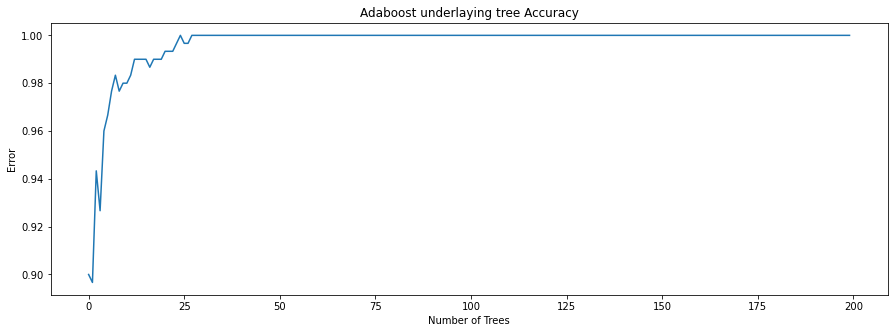

In [65]:

#Structure of the successive Adaboost trees
import matplotlib.pyplot as plt
Ad = AdaBoostClassifier(n_estimators=200, random_state=0) 
Ad.fit(X, Y)
ad_staged=Ad.staged_predict(X)
Ad_seq_errors = []
for Ad_train_predict in Ad.staged_predict(X):
    Ad_seq_errors.append(metrics.accuracy_score(Ad_train_predict, Y)) 
plt.figure(figsize=(15, 5))
plt.plot(Ad_seq_errors); plt.title('Adaboost underlaying tree Accuracy') 
plt.ylabel('Error'); plt.xlabel('Number of Trees')